# Computer Vision Project
In this project, YOLOv5 will be used as the base model and then it will be applied techniques such as knowledge distillation, pruning, and quantization. The goal is to develop the lightest model possible while maintaining optimal inference performance.

## 1. Setup


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%mkdir yolov5_ws
%cd yolov5_ws
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

/content/yolov5_ws
Cloning into 'yolov5'...
remote: Enumerating objects: 16605, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 16605 (delta 50), reused 96 (delta 43), pack-reused 16459
Receiving objects: 100% (16605/16605), 15.34 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (11353/11353), done.
/content/yolov5_ws/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_

In [3]:
!pip install onnx onnxruntime onnxruntime-tools psutil
!pip install torch torchvision thop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 237.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.7 MB/s eta 0:00:00


## 2. Base yolov5 model


- Visualize predictions on the base model for comparison.

In [1]:
!python /content/yolov5_ws/yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/testing/000455.png

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/testing/000455.png, data=yolov5_ws/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5_ws/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 330MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testing/000455.png: 224x640 5 cars, 59.6ms
Speed: 0.6ms pre-process, 59.6ms inference, 710.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5_ws/yolov5/runs/de

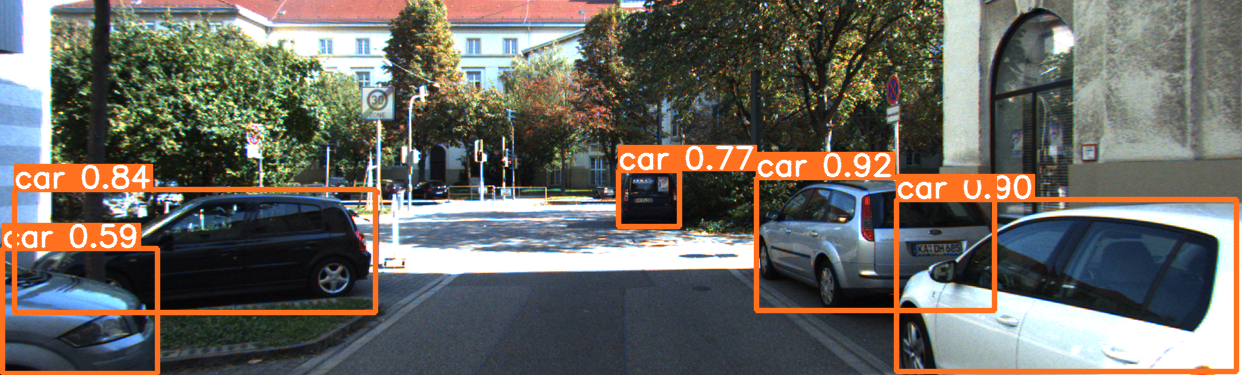

In [2]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp2/000455.png"
display(Image.open(image_path))

- Evaluate Base model without training on custom dataset

In [4]:
!python /content/yolov5_ws/yolov5/val.py --weights yolov5s --data /content/dataset.yaml --img 640 --half

val: data=/content/dataset.yaml, weights=['yolov5s'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_ws/yolov5/runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5_ws/yolov5/val.py", line 438, in <module>
    main(opt)
  File "/content/yolov5_ws/yolov5/val.py", line 409, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5_ws/yolov5/val.py", line 165, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5_ws/yolov5/models/common.py", line 647, in __init_

## 2. Train model

Train model on custom datase

In [6]:
!python /content/yolov5_ws/yolov5/train.py --img 640 --batch 32 --epochs 4 --data /content/dataset.yaml --weights yolov5s.pt

2024-06-12 11:27:36.806565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 11:27:36.806631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 11:27:36.807975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset.yaml, hyp=yolov5_ws/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=4, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5_ws/yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device

Visualize detection of trained model

In [11]:
!python /content/yolov5_ws/yolov5/detect.py --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source /content/drive/MyDrive/testing/000100.png

detect: weights=['/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/testing/000100.png, data=yolov5_ws/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5_ws/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testing/000100.png: 224x640 1 Van, 6 Cars, 85.6ms
Speed: 0.7ms pre-process, 85.6ms inference, 1235.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5_ws/yol

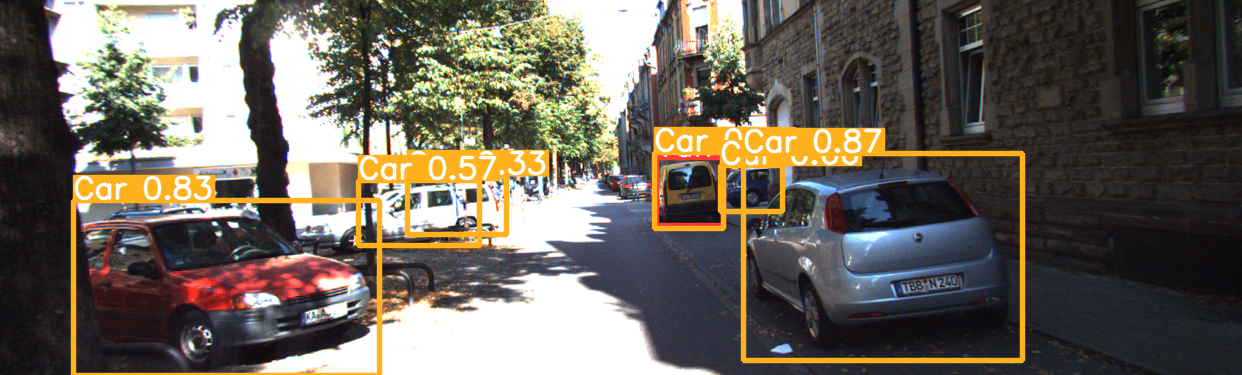

In [13]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp5/000100.png"
display(Image.open(image_path))

Export trained model

In [16]:
!python /content/yolov5_ws/yolov5/export.py  --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt  --include onnx TensorRT

python3: can't open file '/contenT/yolov5_ws/yolov5/export.py': [Errno 2] No such file or directory


Evaluate trained model

In [15]:
!python /content/yolov5_ws/yolov5/val.py --weights /content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt --data /content/dataset.yaml --img 640 --half

val: data=/content/dataset.yaml, weights=['/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_ws/yolov5/runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/training/labels/val.cache... 1490 images, 0 backgrounds, 0 corrupt: 100% 1490/1490 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 47/47 [00:57<00:00,  1.22s/it]
                   all       1490       8782      0.808      0.652       0.74        0.4
                   Van       1490        649      0.789      0.5

In [17]:
!python /content/yolov5_ws/yolov5/val.py --weights /content/best.onnx --data /content/dataset.yaml --img 640 --half

val: data=/content/dataset.yaml, weights=['/content/best.onnx'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_ws/yolov5/runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 MB 156.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.2s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Traceback (most recent call last):
  File "/content/yolov5_ws/yolov5/val.py", line 438, in <module>
    main(opt)
  File "/content/yolov5_ws/yolov5

## 3. Test with diferent techniques

- **knoledge destilation**
- **pruning**
- **quantization**

Wich one or wich combination is the best in reducing the model while mantaining the accuracy

### Test every techique separable

- knoledge distillation

For knoledge distillation used as base the git hub repository present in [Git hub repo](https://https://github.com/wonbeomjang/yolov5-knowledge-distillation)

In [18]:
!git clone https://github.com/wonbeomjang/yolov5-knowledge-distillation.git

Cloning into 'yolov5-knowledge-distillation'...
remote: Enumerating objects: 15823, done.
remote: Total 15823 (delta 0), reused 0 (delta 0), pack-reused 15823
Receiving objects: 100% (15823/15823), 15.03 MiB | 13.00 MiB/s, done.
Resolving deltas: 100% (10672/10672), done.


In [ ]:
!python /content/yolov5-knowledge-distillation/train.py --epochs 20 --data /content/dataset.yaml --cfg /content/yolov5_ws/yolov5/models/yolov5s.yaml --weights '' --batch-size 32 --teacher_weight yolov5s.pt

2024-06-12 13:25:39.901477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 13:25:39.902259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 13:25:39.934188: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, teacher_weight=yolov5s.pt, cfg=yolov5s.yaml, data=/content/dataset.yaml, hyp=yolov5-knowledge-distillation/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, s

- Prunning



Load previous trained model

In [ ]:
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F

In [ ]:
import torch
model = torch.hub.load('/content/yolov5_ws/yolov5/', 'custom', path='/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt', source='local')
ckpt = torch.load('/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt')
model = ckpt['model']

Prune input model

In [ ]:
import torch
from utils.torch_utils import model_info, prune

def prunning(input_model, output_model):
  # Define the device
  device = 'cpu'  # or 'cuda'

  # Load the FP32 model from the .pt file
  checkpoint = torch.load(input_model, map_location=device)
  model = checkpoint['model']
  # Display model information
  model_info(model)
  # Save the FP32 model
  torch.save(checkpoint, input_model)

  # Prune the model with a pruning rate of 0.3
  prune(model, 0.3)
  # Display pruned model information
  model_info(model)
  # Save the pruned model
  torch.save(checkpoint, output_model)

input_model = '/content/yolov5_ws/yolov5/runs/train/exp/weights/best.pt'
output_model = '/content/model_pruned.pt'
prunning(input_model, output_model)

Export prunned model

In [ ]:
!python /content/yolov5_ws/yolov5/export.py  --weights /content/model_pruned.pt  --include onnx

Visualize detection on pruned model

In [ ]:
!python /content/yolov5_ws/yolov5/detect.py --weights /content/model_pruned.onnx --img 640 --conf 0.5 --source /content/drive/MyDrive/testing/image_02/0000/000060.png

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp10/000060.png"
display(Image.open(image_path))

### - Quantization

preprocess model for better quantization

In [ ]:
!python -m onnxruntime.quantization.preprocess --input model_pruned.onnx --output best-infer.onnx

quantized model

In [ ]:
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

def quantized(input_model, output_model):
# Load the ONNX model
onnx_model_path = input_model
model = onnx.load(onnx_model_path)

# Specify the path to save the quantized model
quantized_model_path = output_model

# Quantize the model dynamically using Min-Max quantization
try:
    quantize_dynamic(
        model_input=onnx_model_path,
        model_output=quantized_model_path,
        weight_type=QuantType.QUInt8
    )
    print(f"Quantized model saved to {quantized_model_path}")
except ValueError as e:
    print(f"Quantization failed: {e}")


input_model = '/content/best-infer.onnx'
output_model = '/content/quantized_model.onnx'
quantized(input_model, output_model)

Visualize detection on quantized model

In [ ]:
!python /content/yolov5_ws/yolov5/detect.py --weights /content/quantized_model.onnx --img 640 --conf 0.5 --source /content/drive/MyDrive/testing/image_02/0000/000060.png

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5_ws/yolov5/runs/detect/exp11/000060.png"
display(Image.open(image_path))

Evaluate quantized model

In [ ]:
!python /content/yolov5_ws/yolov5/val.py --weights /content/quantized_model.onnx --data /content/dataset.yaml

## 2. Combine two of the tranformations

### - Knoledged destilation && Pruning

In [ ]:
## input is previous destilled model
input =
output_model = destilation_prunning.pt
prunning(input_model, output_model)

### - Knoledged destilation && Quantization

In [ ]:
## inout is orevious destilled model
input_model = '/content/best-infer.onnx'
output_model = '/content/quantized_model.onnx'
quantized(input_model, output_model)

### - Quantization && Pruning

In [ ]:
input_model = '/content/best-infer.onnx'
output_pruned = '/content/pruned_model.onnx'
output_model =
prunning(input_model, output_pruned)
quantized(output_pruned, output_model)

- Pruning && Quantization

In [ ]:
input_model = '/content/best-infer.onnx'
output_quant = '/content/pruned_model.onnx'
output_model =
quantized(input_model, output_quant)
prunning(output_quant, output_model)

## 3. Combine the three transformations

### - kloedge destilation && pruning && quantization

In [ ]:
input_model = '/content/best-infer.onnx'
output_pruned = '/content/pruned_model.onnx'
output_model =
prunning(input_model, output_pruned)
quantized(output_pruned, output_model)

### - kloedge destilation && quantization && pruning

In [ ]:
input_model = '/content/best-infer.onnx'
output_quant = '/content/pruned_model.onnx'
output_model =
quantized(input_model, output_quant)
prunning(output_quant, output_model)

## Comparation between all the outputs

In [ ]:
from pathlib import Path
from ultralytics import YOLO
import cv2
import time

def video_test(model, input_video, output_video):
    # Load your trained YOLOv8 model
    model_path = model
    model = YOLO(model_path)

    # Path to the input video
    input_video_path = input_video

    # Path to save the output video with inferences
    output_video_path = output_video

    # Open the input video file
    video_capture = cv2.VideoCapture(input_video_path)

    # Get the video's frame width, height, and frames per second (FPS)
    frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))

    # Create a video writer object to save the output video
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    # Start time for inference
    start_time = time.time()

    # Process each frame of the video
    frame_count = 0
    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        # Perform inference on the frame
        results = model(frame)

        # Draw bounding boxes on the frame
        annotated_frame = frame.copy()
        for box in results[0].boxes.xyxy.cpu().numpy():
            xmin, ymin, xmax, ymax = box[:4].astype(int)
            cv2.rectangle(annotated_frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

        # Write the annotated frame to the output video
        video_writer.write(annotated_frame)

        frame_count += 1

    # Release the video capture and video writer objects
    video_capture.release()
    video_writer.release()

    # End time for inference
    end_time = time.time()

    # Calculate the time taken for inference
    inference_time = end_time - start_time

    # Calculate frames per second (FPS)
    video_fps = frame_count / inference_time

    # Print results
    print("Frames per second (FPS):", video_fps)
    print("Time taken for inference:", inference_time, "seconds")


model = "/content/quantized_model.onnx"
input_video = "/content/drive/MyDrive/test.mp4"
output_video = "/content/drive/MyDrive/video_with_inferences.mp4"

### Evaluating ONNX Models on Various Metrics
In this section, we will evaluate several key metrics for three ONNX models. The metrics we will analyze are:

1. **Multiply and Accumulate operations (MACs)**: This metric provides insight into the computational complexity of the model by counting the number of multiply-accumulate operations.
2. **Memory Usage**: We will measure the memory usage during inference to understand the model's memory footprint.
3. **Floating Point Operations (FLOPs)**: Similar to MACs, this metric counts the number of floating-point operations, giving another perspective on the computational load.
4. **Inference Time**: The time taken to perform inference on a specific hardware, which is critical for understanding the real-time performance of the model.
5. **Carbon Footprint**: An estimation of the carbon emissions associated with the energy consumption during model inference.
Efficient Error Rate (EER): A domain-specific metric that needs to be computed based on the model's predictions and the actual values.

In [ ]:
import onnx
import onnxruntime as ort
import numpy as np
import time
import psutil
import os

# Load the ONNX model
def load_model(model_path):
    return onnx.load(model_path)

# Placeholder function to calculate MACs and FLOPs (This would need a proper implementation)
def calculate_macs_flops(model):
    # Placeholder return values
    macs = 0
    flops = 0
    return macs, flops

# Measure inference time on specific hardware
def measure_inference_time(model_path, input_data):
    session = ort.InferenceSession(model_path)
    input_name = session.get_inputs()[0].name
    start_time = time.time()
    session.run(None, {input_name: input_data})
    end_time = time.time()
    return end_time - start_time

# Measure memory usage (RAM)
def measure_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

# Placeholder for Efficient Error Rate (EER) calculation
def calculate_eer(model_path, validation_data):
    # Implement your EER calculation method here
    # Placeholder return value
    return 0.0

# Main evaluation function
def evaluate_model(model_path, input_data, validation_data):
    model = load_model(model_path)
    macs, flops = calculate_macs_flops(model)
    inference_time = measure_inference_time(model_path, input_data)
    memory_usage = measure_memory_usage()
    eer = calculate_eer(model_path, validation_data)

    # Placeholder for carbon footprint calculation
    # Typically based on energy consumption metrics, for simplicity assuming a fixed value
    carbon_footprint = inference_time * 0.0002  # Example conversion rate

    return {
        'MACs': macs,
        'FLOPs': flops,
        'Inference Time (s)': inference_time,
        'Memory Usage (bytes)': memory_usage,
        'Carbon Footprint (kg CO2)': carbon_footprint,
        'EER': eer
    }

# Example usage
if __name__ == "__main__":
    model_paths = ["/content/best.onnx", "/content/model_pruned.onnx", "/content/quantized_model.onnx"]
    input_shape = (1, 3, 640, 640)  # Update input shape to match model's expected input
    input_data = np.random.randn(*input_shape).astype(np.float32)  # Example input data
    validation_data = None  # Load your validation data here

    results = {}
    for model_path in model_paths:
        results[model_path] = evaluate_model(model_path, input_data, validation_data)

    for model_path, metrics in results.items():
        print(f"Metrics for {model_path}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print()